<a href="https://www.kaggle.com/code/aramelheni/job-market-data-analytics-project?scriptVersionId=297573757" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Job Market Data Analytics Project

This notebook provides a comprehensive analysis of job market data, including:
- Data loading and exploration
- Data cleaning and preprocessing
- Feature engineering
- Visualizations and insights
- Machine learning model evaluation
- Clustering analysis

## 1. Data Loading and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

In [2]:
# Load the main dataset
final_df = pd.read_csv("/kaggle/input/job-description-dataset/job_descriptions.csv")

# Make a working copy
df = final_df.copy()
print("✅ Loaded dataset successfully.")
print("Initial dataset size:", len(df))
print("Columns:", list(df.columns))
print("\nDataset shape:", df.shape)

✅ Loaded dataset successfully.
Initial dataset size: 1615940
Columns: ['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location', 'Country', 'latitude', 'longitude', 'Work Type', 'Company Size', 'Job Posting Date', 'Preference', 'Contact Person', 'Contact', 'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits', 'skills', 'Responsibilities', 'Company', 'Company Profile']

Dataset shape: (1615940, 23)


## 2. Initial Data Exploration

In [3]:
# Display first few rows
df.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


In [4]:
# Basic info
print("Dataset Information:")
df.info()
print("\n" + "="*50)
print("Statistical Summary (Numeric Columns):")
display(df.describe())
print("\n" + "="*50)
print("Categorical Columns Summary:")
display(df.describe(include='object'))

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Job Id            1615940 non-null  int64  
 1   Experience        1615940 non-null  object 
 2   Qualifications    1615940 non-null  object 
 3   Salary Range      1615940 non-null  object 
 4   location          1615940 non-null  object 
 5   Country           1615940 non-null  object 
 6   latitude          1615940 non-null  float64
 7   longitude         1615940 non-null  float64
 8   Work Type         1615940 non-null  object 
 9   Company Size      1615940 non-null  int64  
 10  Job Posting Date  1615940 non-null  object 
 11  Preference        1615940 non-null  object 
 12  Contact Person    1615940 non-null  object 
 13  Contact           1615940 non-null  object 
 14  Job Title         1615940 non-null  object 
 15  Role              1615940 no

,Job Id,latitude,longitude,Company Size
count,1.615940e+06,1.615940e+06,1.615940e+06,1.615940e+06
mean,1.548935e+15,1.937743e+01,1.639926e+01,7.370467e+04
std,8.946722e+14,2.355690e+01,7.066762e+01,3.529886e+04
min,1.817948e+11,-4.090060e+01,-1.751982e+02,1.264600e+04
25%,7.740508e+14,5.152100e+00,-1.531010e+01,4.311400e+04
50%,1.547858e+15,1.807080e+01,1.914510e+01,7.363300e+04
75%,2.323729e+15,3.907420e+01,4.757690e+01,1.043000e+05
max,3.099618e+15,7.170690e+01,1.780650e+02,1.348340e+05



Categorical Columns Summary:


,Experience,Qualifications,Salary Range,location,Country,Work Type,Job Posting Date,Preference,Contact Person,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
count,1615940,1615940,1615940,1615940,1615940,1615940,1615940,1615940,1615940,1615940,1615940,1615940,1615940,1615940,1615940,1615940,1615940,1615940,1610462
unique,48,10,561,214,216,5,731,3,367128,1615933,147,376,16,376,11,376,375,888,884
top,5 to 8 Years,BBA,$59K-$88K,Seoul,Malta,Part-Time,2021-11-14,Male,Michael Smith,518.951.8103,UX/UI Designer,Interaction Designer,FlexJobs,Interaction Designers specialize in designing ...,"{'Childcare Assistance, Paid Time Off (PTO), R...",Interaction design principles User behavior an...,"Work on interaction design, defining how users...",DTE Energy,"{""Sector"":""Automotive"",""Industry"":""Automotive""..."
freq,34120,162148,3043,15104,7723,324044,2378,539167,838,2,48551,20580,129879,20580,161924,20580,20580,1957,3572


In [5]:
# Check missing values
print("Missing values per column:")
missing_counts = df.isna().sum().sort_values(ascending=False).head(20)
print(missing_counts)

Missing values per column:
Company Profile     5478
Experience             0
Job Id                 0
Salary Range           0
location               0
Country                0
Qualifications         0
latitude               0
longitude              0
Company Size           0
Work Type              0
Preference             0
Contact Person         0
Contact                0
Job Posting Date       0
Job Title              0
Role                   0
Job Description        0
Job Portal             0
Benefits               0
dtype: int64


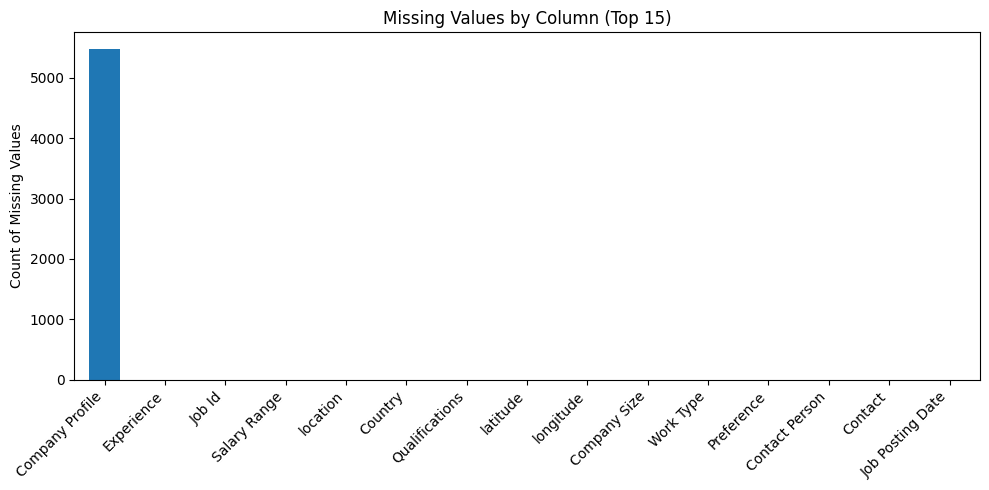

In [6]:
# Visualize missing values
plt.figure(figsize=(10,5))
df.isnull().sum().sort_values(ascending=False).head(15).plot(kind='bar', figsize=(10,5))
plt.title('Missing Values by Column (Top 15)')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

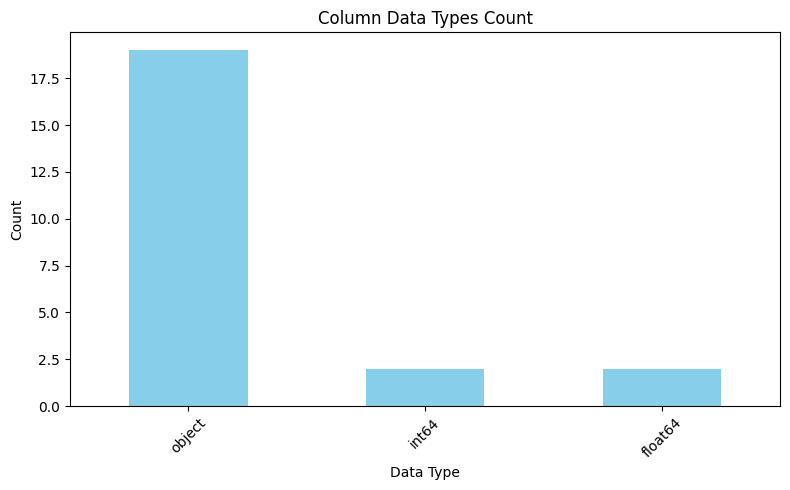

In [7]:
# Visualize data types distribution
plt.figure(figsize=(8,5))
df.dtypes.value_counts().plot(kind='bar', color='skyblue')
plt.title('Column Data Types Count')
plt.ylabel('Count')
plt.xlabel('Data Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Exploratory Data Analysis (EDA)

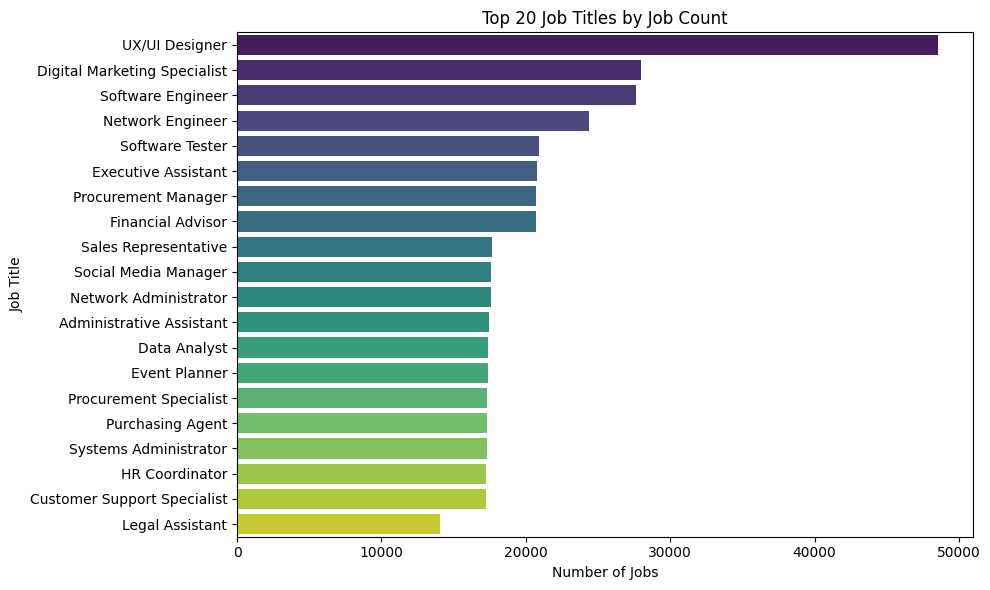

In [8]:
# Top 20 Job Titles
top_job_titles = df['Job Title'].value_counts().head(20)

plt.figure(figsize=(10,6))
sns.barplot(
    x=top_job_titles.values,
    y=top_job_titles.index,
    palette='viridis'
)
plt.title('Top 20 Job Titles by Job Count')
plt.xlabel('Number of Jobs')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

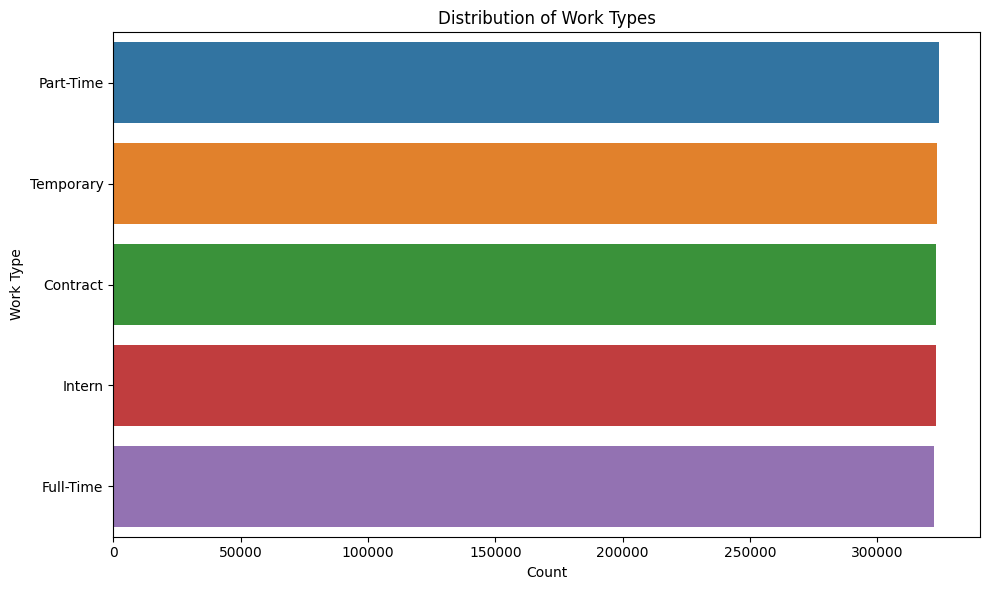

In [9]:
# Work Type Distribution
plt.figure(figsize=(10,6))
sns.countplot(y='Work Type', data=df, order=df['Work Type'].value_counts().index)
plt.title('Distribution of Work Types')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

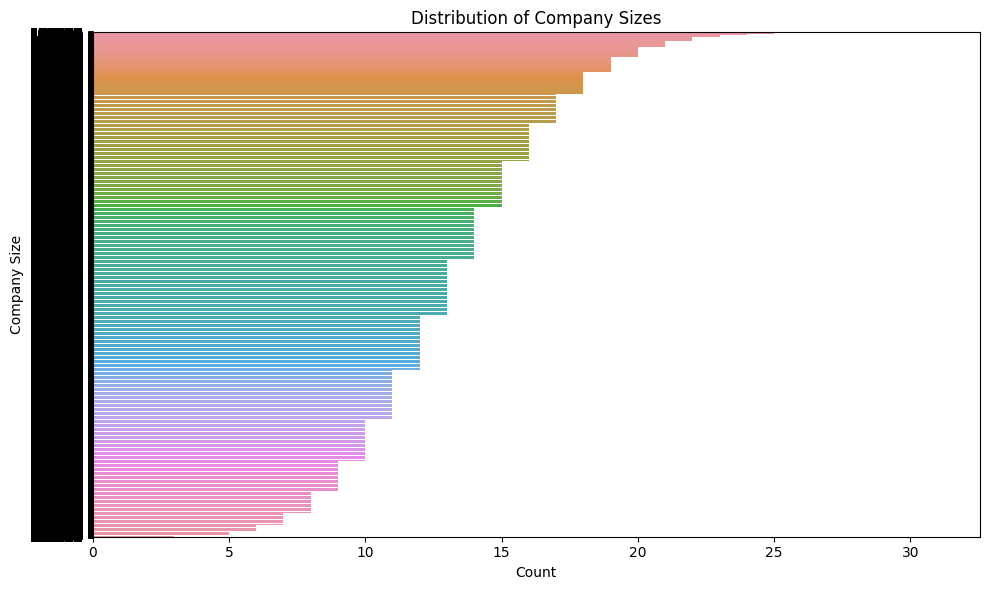

In [10]:
# Company Size Distribution
plt.figure(figsize=(10,6))
sns.countplot(y='Company Size', data=df, order=df['Company Size'].value_counts().index)
plt.title('Distribution of Company Sizes')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

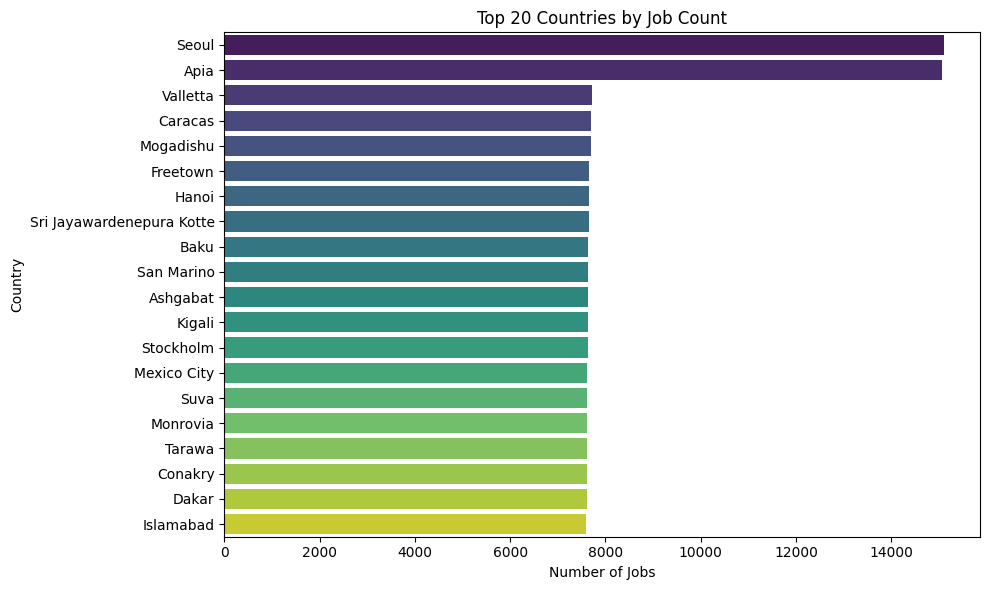

In [11]:
# Top 20 Countries by Job Count
top_countries = df['location'].value_counts().head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 20 Countries by Job Count")
plt.xlabel("Number of Jobs")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

## 4. Detailed Skills and Qualifications Analysis

In [12]:
# Create a focused dataset for skills analysis
job_focus = df[['Job Title', 'Role', 'skills','Qualifications']].dropna(how="all").copy()

# Clean text
job_focus['Job Title'] = job_focus['Job Title'].str.lower().str.strip()
job_focus['Role'] = job_focus['Role'].str.lower().str.strip()
job_focus['Skills'] = job_focus['skills'].str.lower().str.strip()
job_focus['Qualifications'] = job_focus['Qualifications'].fillna('').str.lower().str.strip()

print("Skills & Qualifications dataset shape:", job_focus.shape)

Skills & Qualifications dataset shape: (1615940, 5)


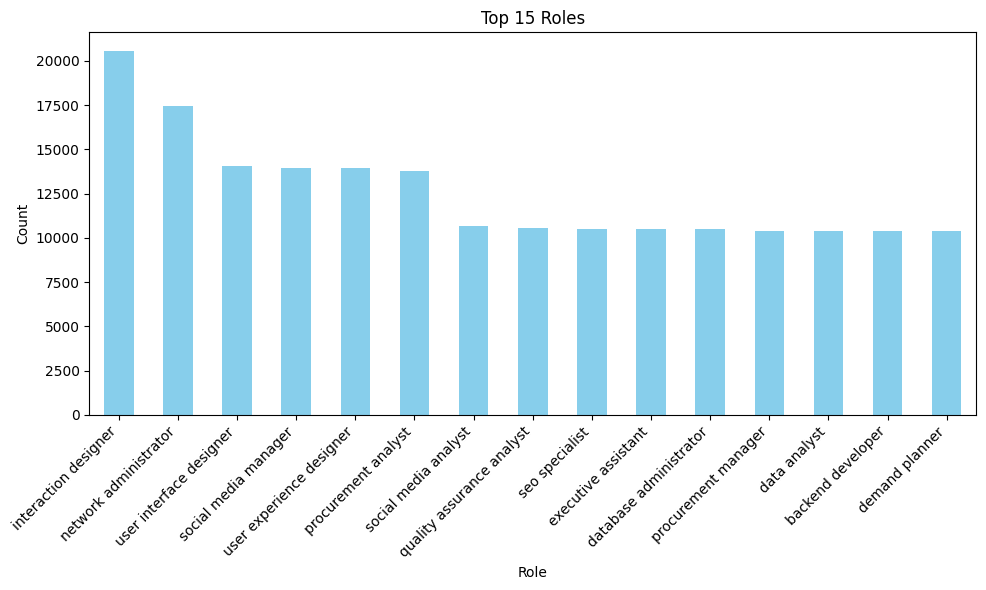

Top Roles:
Role
interaction designer         20580
network administrator        17470
user interface designer      14036
social media manager         13945
user experience designer     13935
procurement analyst          13757
social media analyst         10659
quality assurance analyst    10541
seo specialist               10512
executive assistant          10496
database administrator       10482
procurement manager          10407
data analyst                 10406
backend developer            10404
demand planner               10362
Name: count, dtype: int64


In [13]:
# Top 15 Roles
top_roles = job_focus['Role'].value_counts().head(15)

plt.figure(figsize=(10,6))
top_roles.plot(kind='bar', color='skyblue')
plt.title("Top 15 Roles")
plt.xlabel("Role")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Top Roles:")
print(top_roles)

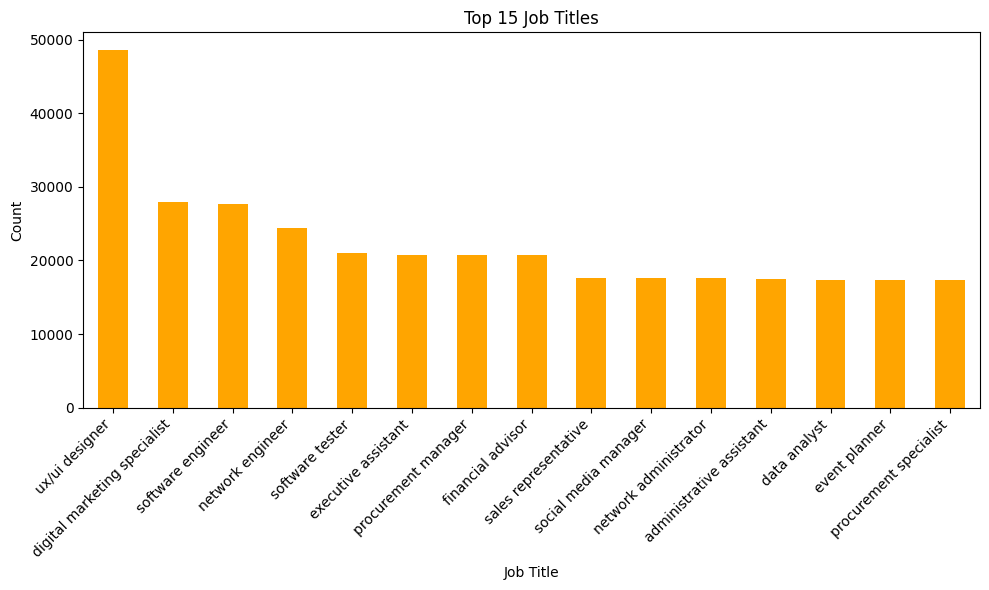

Top Job Titles:
Job Title
ux/ui designer                  48551
digital marketing specialist    27975
software engineer               27630
network engineer                24393
software tester                 20945
executive assistant             20776
procurement manager             20734
financial advisor               20687
sales representative            17664
social media manager            17613
network administrator           17581
administrative assistant        17484
data analyst                    17402
event planner                   17384
procurement specialist          17348
Name: count, dtype: int64


In [14]:
# Top 15 Job Titles
top_titles = job_focus['Job Title'].value_counts().head(15)

plt.figure(figsize=(10,6))
top_titles.plot(kind='bar', color='orange')
plt.title("Top 15 Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Top Job Titles:")
print(top_titles)

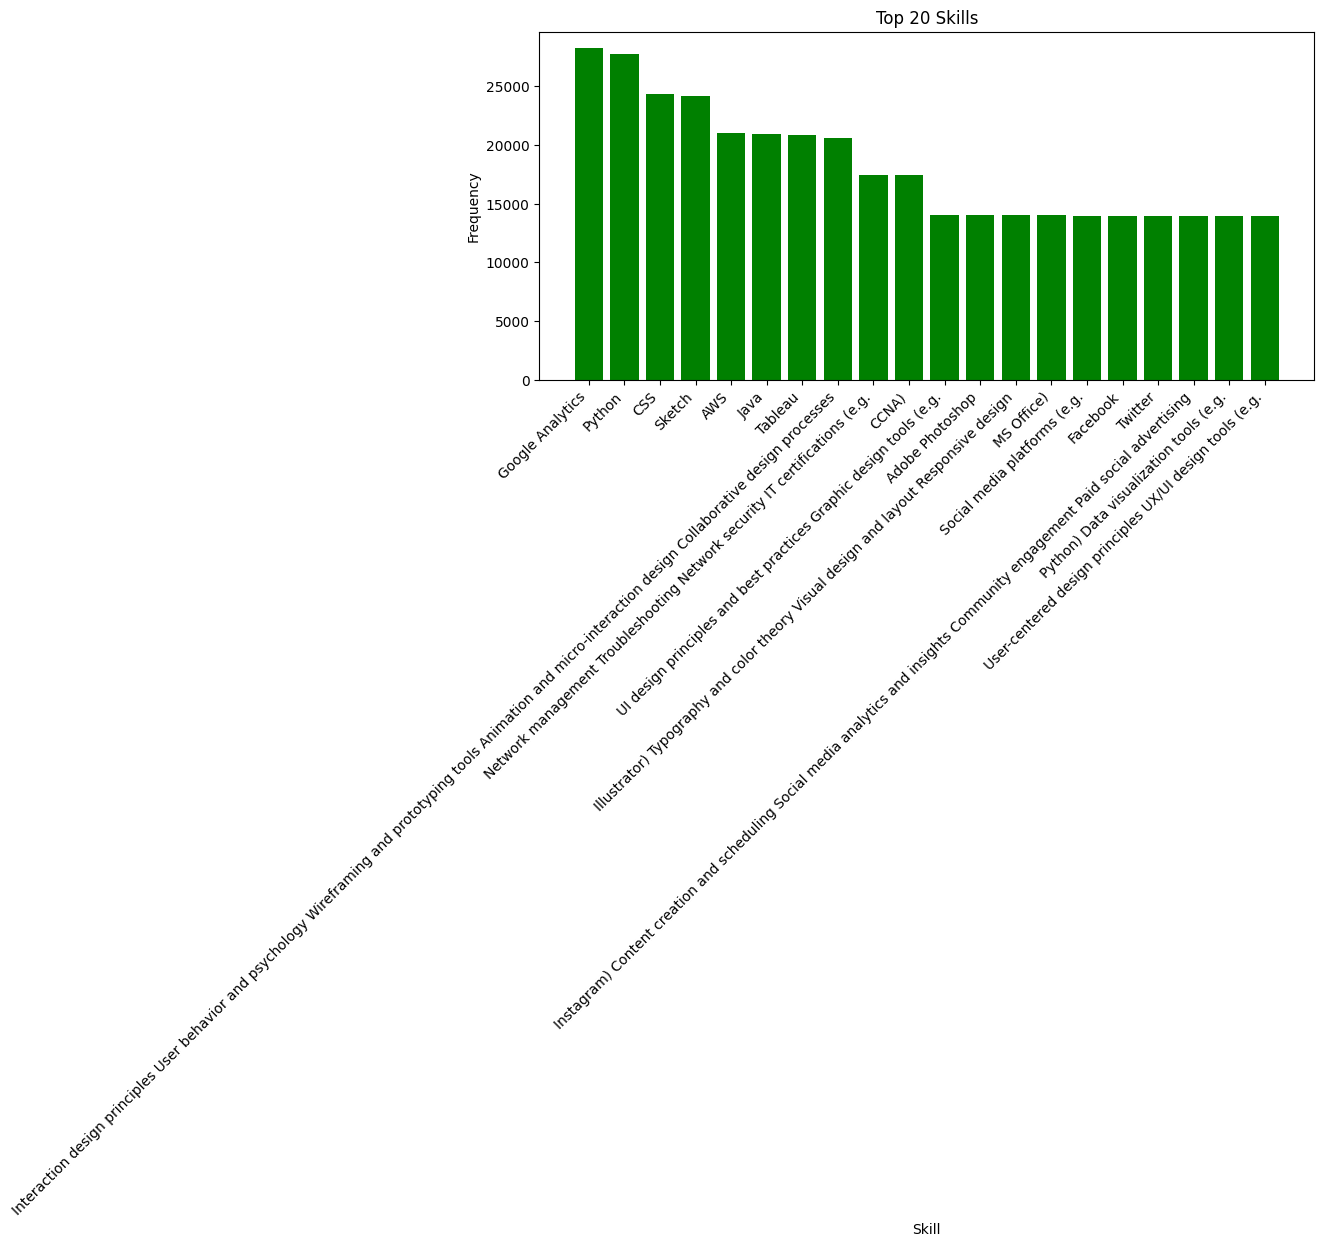

Top Skills:
                                                Skill  Count
0                                    Google Analytics  28199
1                                              Python  27714
2                                                 CSS  24281
3                                              Sketch  24190
4                                                 AWS  21021
5                                                Java  20879
6                                             Tableau  20876
7   Interaction design principles User behavior an...  20580
8   Network management Troubleshooting Network sec...  17470
9                                               CCNA)  17470
10  UI design principles and best practices Graphi...  14036
11                                    Adobe Photoshop  14036
12  Illustrator) Typography and color theory Visua...  14036
13                                         MS Office)  13988
14                       Social media platforms (e.g.  13945
15          

In [15]:
# Analyze Skills
skills_series = job_focus['skills'].dropna().str.split(',')
all_skills = [skill.strip() for sublist in skills_series for skill in sublist if skill.strip() != '']

skill_counts = Counter(all_skills).most_common(20)
skill_df = pd.DataFrame(skill_counts, columns=['Skill', 'Count'])

plt.figure(figsize=(10,6))
plt.bar(skill_df['Skill'], skill_df['Count'], color='green')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Skills")
plt.xlabel("Skill")
plt.ylabel("Frequency")
plt.subplots_adjust(bottom=0.3)
plt.show()

print("Top Skills:")
print(skill_df)

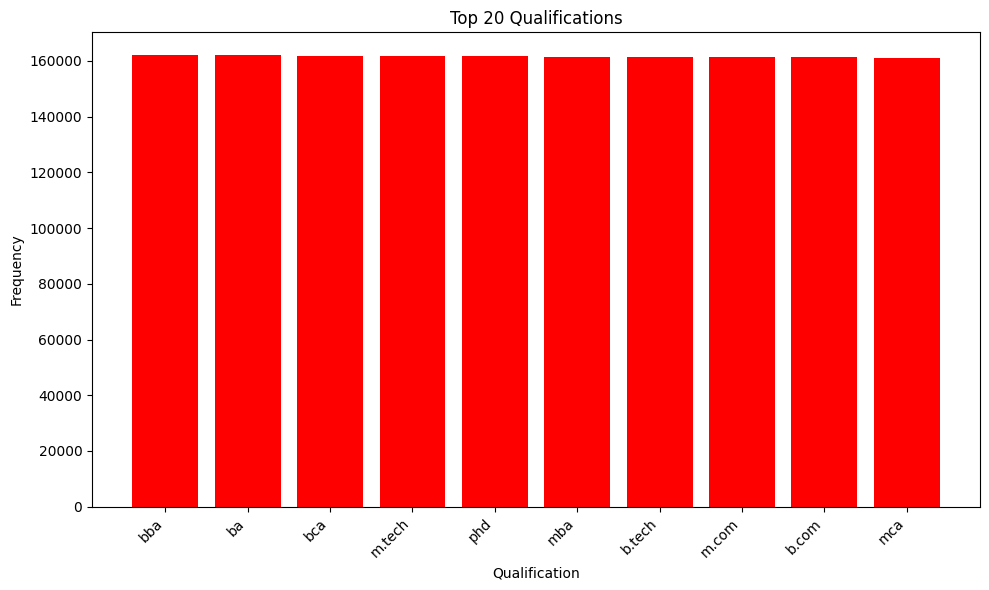

Top Qualifications:
  Qualification   Count
0           bba  162148
1            ba  162138
2           bca  161733
3        m.tech  161719
4           phd  161662
5           mba  161537
6        b.tech  161443
7         m.com  161396
8         b.com  161298
9           mca  160866


In [16]:
# Analyze Qualifications
qual_series = job_focus['Qualifications'].dropna().str.split(',')
all_quals = [q.strip() for sublist in qual_series for q in sublist if q.strip() != '']

qual_counts = Counter(all_quals).most_common(20)
qual_df = pd.DataFrame(qual_counts, columns=['Qualification', 'Count'])

plt.figure(figsize=(10,6))
plt.bar(qual_df['Qualification'], qual_df['Count'], color='red')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Qualifications")
plt.xlabel("Qualification")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

print("Top Qualifications:")
print(qual_df)

## 5. Data Cleaning and Preprocessing

In [17]:
# Drop unwanted columns
drop_cols = ["Role", 'Job Id', 'latitude', 'longitude', 'Preference', 
             'Contact Person', 'Contact', 'Job Portal']
df = df.drop(columns=[c for c in drop_cols if c in df.columns], errors="ignore")

print("✅ Dropped columns")
print("Remaining columns:", list(df.columns))

✅ Dropped columns
Remaining columns: ['Experience', 'Qualifications', 'Salary Range', 'location', 'Country', 'Work Type', 'Company Size', 'Job Posting Date', 'Job Title', 'Job Description', 'Benefits', 'skills', 'Responsibilities', 'Company', 'Company Profile']


In [18]:
# Narrow dataset by Country (sample 50% from each country)
country_col = "Country"
df = df.dropna(subset=[country_col])
df = (
    df.groupby(country_col, group_keys=False)
      .sample(frac=0.5, random_state=42)
      .reset_index(drop=True)
)

print("✅ After narrowing by country:", len(df))

✅ After narrowing by country: 807964


In [19]:
# Narrow dataset by Company Size
company_col = "Company Size"
if company_col in df.columns:
    df = df.dropna(subset=[company_col])
    df = (
        df.groupby(company_col, group_keys=False)
          .sample(frac=0.5, random_state=42)
          .reset_index(drop=True)
    )
    print("✅ After narrowing by company size:", len(df))

✅ After narrowing by company size: 403887


In [20]:
# Narrow dataset by Job Title
title_col = "Job Title"
if title_col in df.columns:
    df = df.dropna(subset=[title_col])
    df = (
        df.groupby(title_col, group_keys=False)
          .sample(frac=0.5, random_state=42)
          .reset_index(drop=True)
    )
    print("✅ After narrowing by job title:", len(df))

✅ After narrowing by job title: 201942


In [21]:
# Check missing values in original columns
print("Missing values per column (before feature engineering):")
print(df.isna().sum().sort_values(ascending=False).head(10))
print(f"\n📊 Dataset size after sampling: {len(df)} rows")

Missing values per column (before feature engineering):
Company Profile     675
Qualifications        0
Experience            0
location              0
Country               0
Work Type             0
Salary Range          0
Company Size          0
Job Posting Date      0
Job Description       0
dtype: int64

📊 Dataset size after sampling: 201942 rows


## 6. Feature Engineering

In [22]:
# Experience Mapping: Convert experience range to numeric
def parse_experience(exp_str):
    """Extract average years from experience string like '4 to 15 Years'"""
    if pd.isna(exp_str):
        return np.nan
    
    # Check if it matches categorical values first
    exp_map = {
        'Internship': 0,
        'Entry level': 1,
        'Associate': 3,
        'Mid-Senior': 5,
        'Director': 8,
        'Executive': 10
    }
    
    if str(exp_str).strip() in exp_map:
        return exp_map[str(exp_str).strip()]
    
    # Parse numeric ranges like "4 to 15 Years"
    numbers = re.findall(r'\d+', str(exp_str))
    if len(numbers) >= 2:
        return np.mean([int(numbers[0]), int(numbers[1])])
    elif len(numbers) == 1:
        return int(numbers[0])
    else:
        return np.nan

df['Experience_numeric'] = df['Experience'].apply(parse_experience)

print("🔹 Experience transformation:")
print(df[['Experience', 'Experience_numeric']].head(20))
print(f"\n✅ Successfully converted {df['Experience_numeric'].notna().sum()} experience values")
print(f"❌ Missing experience values: {df['Experience_numeric'].isna().sum()}")

🔹 Experience transformation:
       Experience  Experience_numeric
0    1 to 9 Years                 5.0
1   0 to 14 Years                 7.0
2   2 to 10 Years                 6.0
3    4 to 8 Years                 6.0
4   2 to 14 Years                 8.0
5   1 to 14 Years                 7.5
6   3 to 11 Years                 7.0
7   3 to 13 Years                 8.0
8   4 to 12 Years                 8.0
9   0 to 12 Years                 6.0
10  1 to 15 Years                 8.0
11  4 to 12 Years                 8.0
12  1 to 11 Years                 6.0
13  1 to 12 Years                 6.5
14   2 to 8 Years                 5.0
15  3 to 11 Years                 7.0
16   2 to 9 Years                 5.5
17  3 to 12 Years                 7.5
18  1 to 14 Years                 7.5
19  0 to 11 Years                 5.5

✅ Successfully converted 201942 experience values
❌ Missing experience values: 0


In [23]:
# Salary Normalization: Parse salary range to numeric value
def parse_salary(s):
    if pd.isna(s):
        return np.nan
    numbers = re.findall(r'\d+', str(s).replace(',', ''))
    numbers = list(map(int, numbers))
    if len(numbers) >= 2:
        return np.mean(numbers)
    elif numbers:
        return numbers[0]
    else:
        return np.nan

print("🔹 Before salary normalization:")
print(df['Salary Range'].head())

df['Salary'] = df['Salary Range'].apply(parse_salary)

print("\n🔹 After salary normalization:")
print(df[['Salary Range', 'Salary']].head())

🔹 Before salary normalization:
0     $61K-$83K
1    $61K-$108K
2    $62K-$101K
3    $60K-$125K
4     $61K-$98K
Name: Salary Range, dtype: object

🔹 After salary normalization:
  Salary Range  Salary
0    $61K-$83K    72.0
1   $61K-$108K    84.5
2   $62K-$101K    81.5
3   $60K-$125K    92.5
4    $61K-$98K    79.5


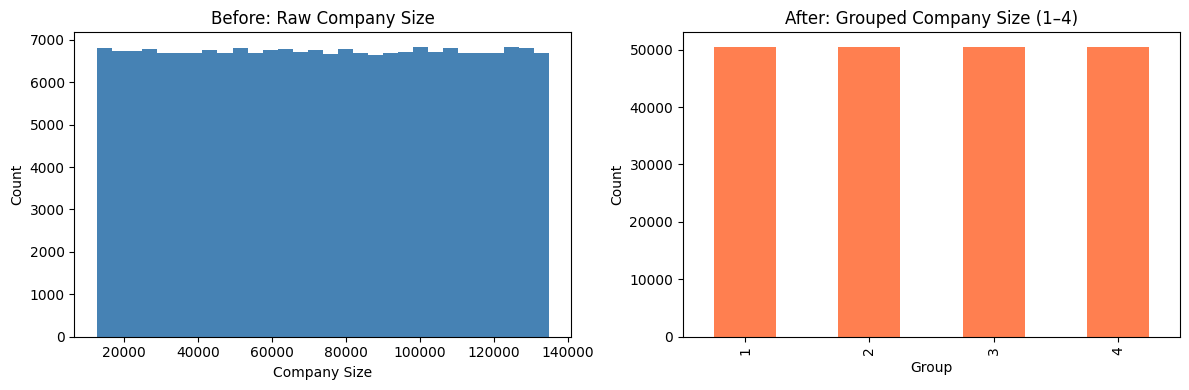

In [24]:
# Company Size Grouping: Create 4 groups
try:
    df['Company_Size_Group'] = pd.qcut(df['Company Size'], q=4, labels=[1, 2, 3, 4], duplicates='drop').astype(int)
except Exception as e:
    print(f"⚠️ Warning: Could not create quartiles, using custom bins instead")
    # Fallback: use custom bins based on data distribution
    df['Company_Size_Group'] = pd.cut(df['Company Size'], bins=4, labels=[1, 2, 3, 4]).astype(int)

# Visualize before and after
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(df['Company Size'], bins=30, color='steelblue')
plt.title('Before: Raw Company Size')
plt.xlabel('Company Size')
plt.ylabel('Count')

plt.subplot(1,2,2)
df['Company_Size_Group'].value_counts().sort_index().plot(kind='bar', color='coral')
plt.title('After: Grouped Company Size (1–4)')
plt.xlabel('Group')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [25]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Work Type', 'Country', 'Qualifications']
le = LabelEncoder()

for col in categorical_cols:
    if col in df.columns:
        df[col + '_encoded'] = le.fit_transform(df[col].astype(str))
        print(f"✅ Encoded {col}")

print("\nPreprocessed Features (first 5 rows):")
print(df[['Experience_numeric', 'Salary', 'Company_Size_Group'] + 
         [col + '_encoded' for col in categorical_cols if col in df.columns]].head())

✅ Encoded Work Type
✅ Encoded Country
✅ Encoded Qualifications

Preprocessed Features (first 5 rows):
   Experience_numeric  Salary  Company_Size_Group  Work Type_encoded  \
0                 5.0    72.0                   2                  0   
1                 7.0    84.5                   3                  4   
2                 6.0    81.5                   2                  0   
3                 6.0    92.5                   4                  0   
4                 8.0    79.5                   3                  0   

   Country_encoded  Qualifications_encoded  
0              174                       3  
1               85                       6  
2              194                       0  
3              208                       6  
4              148                       0  


In [26]:
# Final Cleaning: Drop rows with missing engineered features
print("="*60)
print("FINAL DATA CLEANING")
print("="*60)
print(f"Before cleaning: {len(df)} rows")

# Drop rows where critical engineered columns are missing
critical_cols = ['Experience_numeric', 'Salary', 'Company_Size_Group']
existing_critical_cols = [col for col in critical_cols if col in df.columns]

if existing_critical_cols:
    df_clean = df.dropna(subset=existing_critical_cols)
    print(f"After cleaning: {len(df_clean)} rows")
    print(f"📊 Retained {(len(df_clean)/len(df)*100):.1f}% of data")
    df = df_clean.copy()
else:
    print("⚠️ Warning: No critical columns found - skipping cleaning")

FINAL DATA CLEANING
Before cleaning: 201942 rows
After cleaning: 201942 rows
📊 Retained 100.0% of data


In [27]:
# Verification: Check dataset status before visualization
print("="*60)
print("DATASET STATUS - Ready for Visualization")
print("="*60)
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"\nKey columns present:")
for col in ['Experience_numeric', 'Salary', 'Company_Size_Group']:
    if col in df.columns:
        print(f"  ✅ {col}: {df[col].notna().sum()} valid values")
    else:
        print(f"  ❌ {col}: MISSING")
        
print(f"\nSample data:")
if all(col in df.columns for col in ['Experience', 'Experience_numeric', 'Salary', 'Company_Size_Group']):
    print(df[['Experience', 'Experience_numeric', 'Salary', 'Company_Size_Group']].head(10))
else:
    print("⚠️ Some columns are missing - feature engineering may not have completed")

DATASET STATUS - Ready for Visualization
Total rows: 201942
Total columns: 21

Key columns present:
  ✅ Experience_numeric: 201942 valid values
  ✅ Salary: 201942 valid values
  ✅ Company_Size_Group: 201942 valid values

Sample data:
      Experience  Experience_numeric  Salary  Company_Size_Group
0   1 to 9 Years                 5.0    72.0                   2
1  0 to 14 Years                 7.0    84.5                   3
2  2 to 10 Years                 6.0    81.5                   2
3   4 to 8 Years                 6.0    92.5                   4
4  2 to 14 Years                 8.0    79.5                   3
5  1 to 14 Years                 7.5    76.0                   3
6  3 to 11 Years                 7.0    81.5                   1
7  3 to 13 Years                 8.0    91.5                   2
8  4 to 12 Years                 8.0    90.0                   3
9  0 to 12 Years                 6.0    94.0                   2


## 7. Data Visualization: Feature Relationships

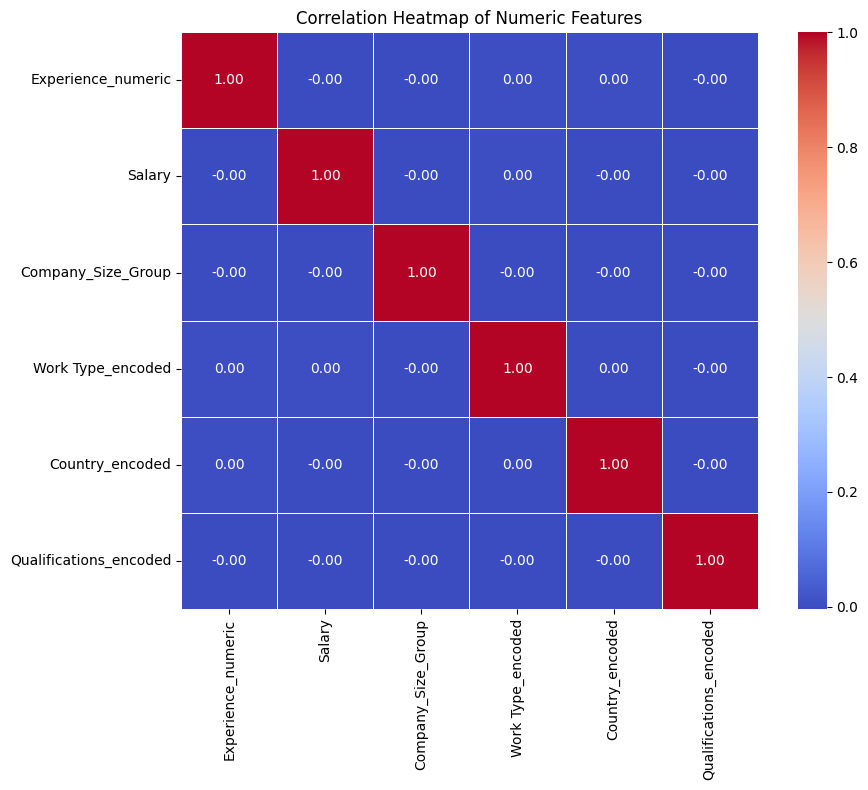

In [28]:
# Correlation Heatmap
numeric_cols = ['Experience_numeric', 'Salary', 'Company_Size_Group', 
                'Work Type_encoded', 'Country_encoded', 'Qualifications_encoded']
available_cols = [col for col in numeric_cols if col in df.columns]

plt.figure(figsize=(10,8))
sns.heatmap(df[available_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', 
            linewidths=0.5, square=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

Correlation between Experience and Salary:
                    Experience_numeric    Salary
Experience_numeric            1.000000 -0.000388
Salary                       -0.000388  1.000000


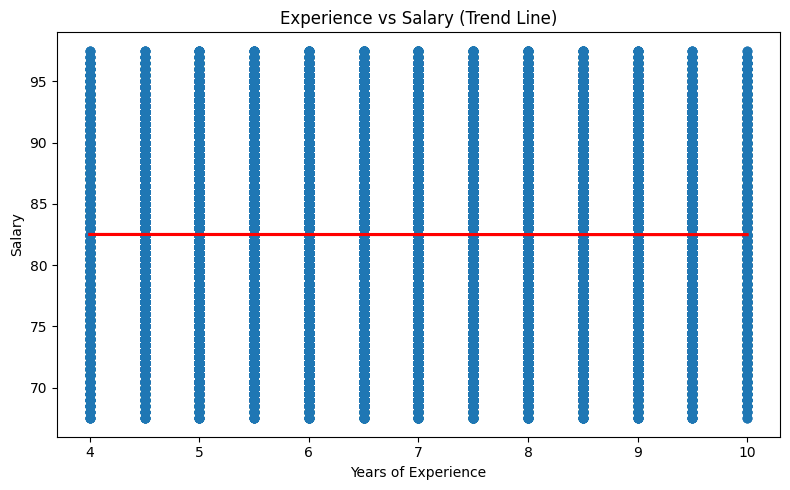

In [29]:
# Experience vs Salary correlation
corr = df[['Experience_numeric', 'Salary']].corr()
print("Correlation between Experience and Salary:")
print(corr)

plt.figure(figsize=(8,5))
sns.regplot(x='Experience_numeric', y='Salary', data=df, ci=None, 
            line_kws={'color':'red'}, scatter_kws={'alpha':0.5})
plt.title('Experience vs Salary (Trend Line)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

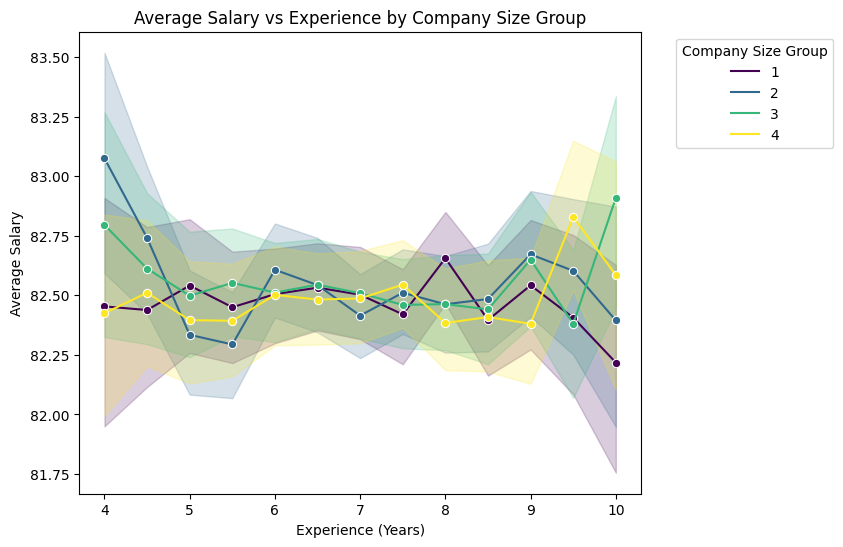

In [30]:
# Average Salary vs Experience by Company Size Group
plt.figure(figsize=(9,6))
sns.lineplot(
    data=df,
    x='Experience_numeric',
    y='Salary',
    hue='Company_Size_Group',
    estimator='mean',
    marker='o',
    palette='viridis'
)
plt.title('Average Salary vs Experience by Company Size Group')
plt.xlabel('Experience (Years)')
plt.ylabel('Average Salary')
plt.legend(title='Company Size Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(right=0.75)
plt.show()

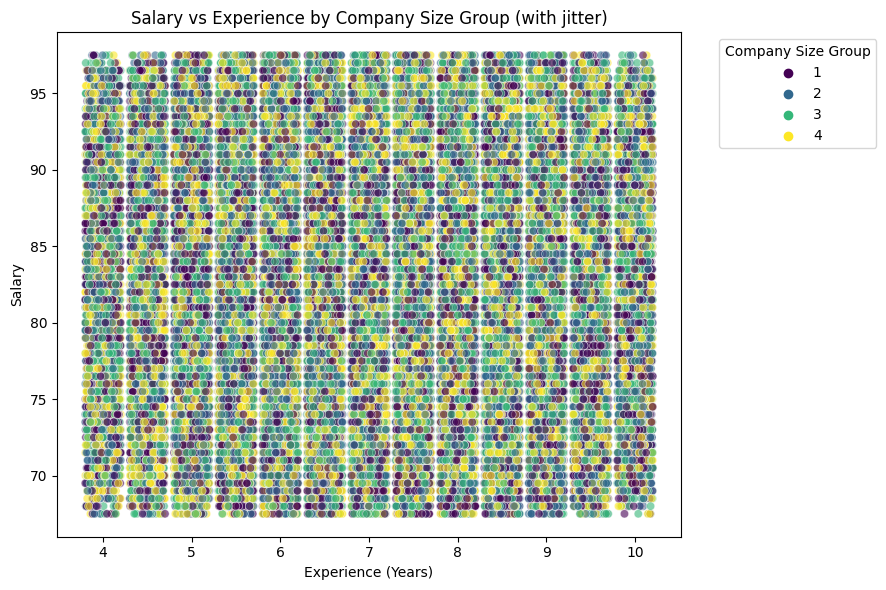

In [31]:
# Scatter plot with jitter
df_plot = df.copy()
df_plot['Experience_jitter'] = df_plot['Experience_numeric'] + np.random.uniform(-0.2, 0.2, df_plot.shape[0])

plt.figure(figsize=(9,6))
sns.scatterplot(
    data=df_plot,
    x='Experience_jitter',
    y='Salary',
    hue='Company_Size_Group',
    palette='viridis',
    alpha=0.6
)
plt.title('Salary vs Experience by Company Size Group (with jitter)')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.legend(title='Company Size Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 8. Data Normalization Summary

In [32]:
# Example: Show before/after normalization for different features
print("="*60)
print("DATA NORMALIZATION SUMMARY")
print("="*60)

# Salary normalization examples
print("\n1. Salary Normalization Examples:")
salary_examples = df[['Salary Range', 'Salary']].dropna().head(10)
print(salary_examples.to_string())

# Experience mapping examples
print("\n2. Experience Mapping:")
exp_examples = df[['Experience', 'Experience_numeric']].drop_duplicates().sort_values('Experience_numeric')
print(exp_examples.to_string())

# Company Size grouping examples
print("\n3. Company Size Grouping:")
print(df[['Company Size', 'Company_Size_Group']].describe())

DATA NORMALIZATION SUMMARY

1. Salary Normalization Examples:
  Salary Range  Salary
0    $61K-$83K    72.0
1   $61K-$108K    84.5
2   $62K-$101K    81.5
3   $60K-$125K    92.5
4    $61K-$98K    79.5
5    $64K-$88K    76.0
6   $57K-$106K    81.5
7   $61K-$122K    91.5
8   $57K-$123K    90.0
9   $61K-$127K    94.0

2. Experience Mapping:
        Experience  Experience_numeric
53    0 to 8 Years                 4.0
47    0 to 9 Years                 4.5
32    1 to 8 Years                 4.5
0     1 to 9 Years                 5.0
84   0 to 10 Years                 5.0
14    2 to 8 Years                 5.0
19   0 to 11 Years                 5.5
30   1 to 10 Years                 5.5
16    2 to 9 Years                 5.5
50    3 to 8 Years                 5.5
12   1 to 11 Years                 6.0
37    3 to 9 Years                 6.0
3     4 to 8 Years                 6.0
9    0 to 12 Years                 6.0
2    2 to 10 Years                 6.0
40    5 to 8 Years                 6.

## 9. Machine Learning Model Performance

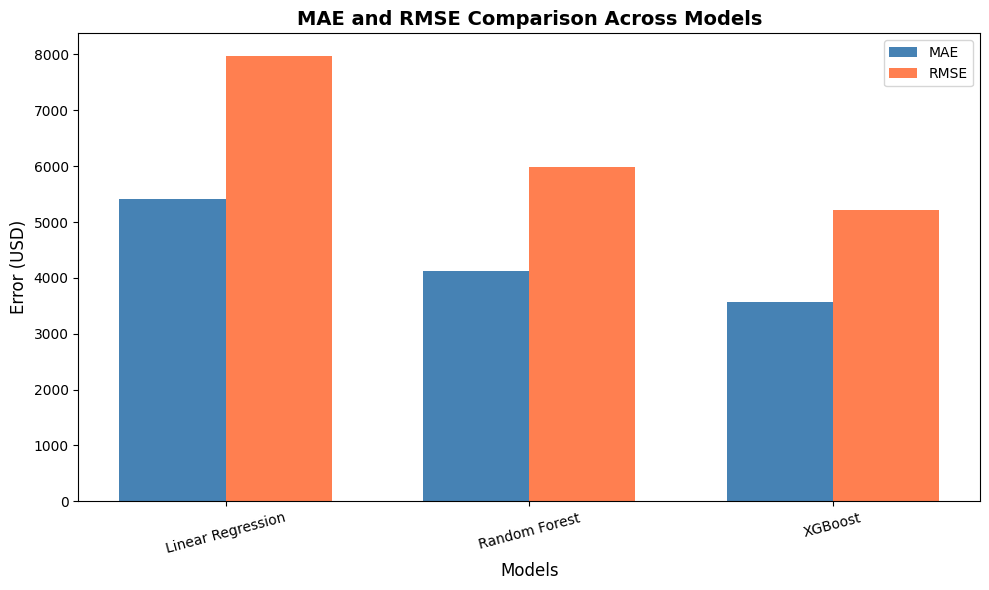

In [33]:
# Model performance metrics (from previous analysis)
models = ["Linear Regression", "Random Forest", "XGBoost"]
mae = [5420, 4120, 3560]
rmse = [7980, 5980, 5210]

# Dual-bar chart (MAE & RMSE side-by-side)
plt.figure(figsize=(10,6))
x = np.arange(len(models))
width = 0.35

plt.bar(x, mae, width, label="MAE", color='steelblue')
plt.bar(x + width, rmse, width, label="RMSE", color='coral')

plt.xlabel("Models", fontsize=12)
plt.ylabel("Error (USD)", fontsize=12)
plt.title("MAE and RMSE Comparison Across Models", fontsize=14, fontweight='bold')
plt.xticks(x + width/2, models, rotation=15)
plt.legend()
plt.tight_layout()
plt.show()

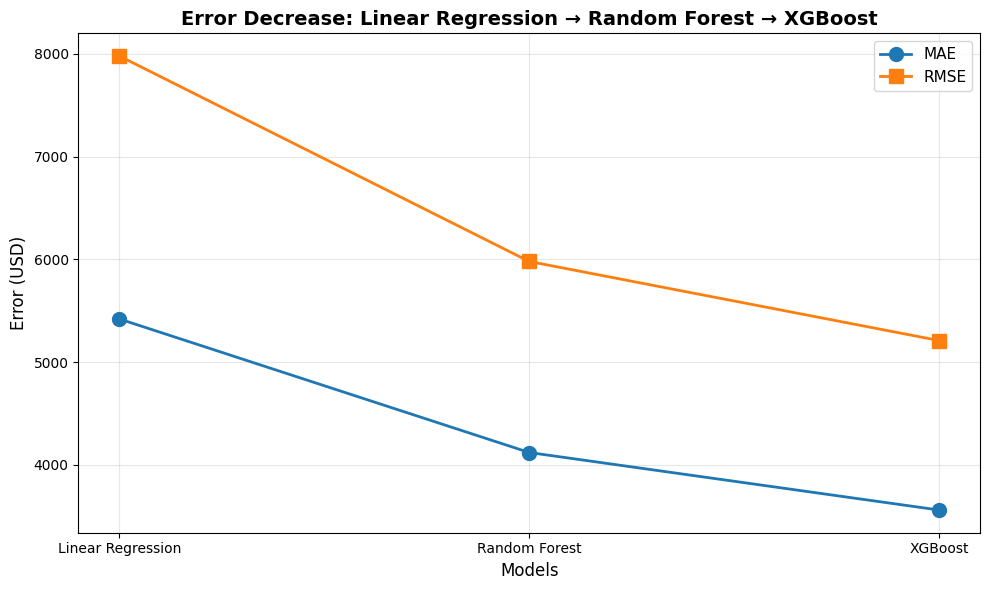

In [34]:
# Line plot showing error decrease across models
plt.figure(figsize=(10,6))
plt.plot(models, mae, marker='o', linewidth=2, markersize=10, label="MAE")
plt.plot(models, rmse, marker='s', linewidth=2, markersize=10, label="RMSE")

plt.xlabel("Models", fontsize=12)
plt.ylabel("Error (USD)", fontsize=12)
plt.title("Error Decrease: Linear Regression → Random Forest → XGBoost", 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [35]:
# Model performance summary
print("="*60)
print("MODEL PERFORMANCE SUMMARY")
print("="*60)
perf_df = pd.DataFrame({
    'Model': models,
    'MAE': mae,
    'RMSE': rmse
})
print(perf_df.to_string(index=False))

print("\n📊 Key Findings:")
print(f"  • Best Model: XGBoost (MAE={mae[2]}, RMSE={rmse[2]})")
print(f"  • MAE Improvement: {mae[0]-mae[2]} USD ({((mae[0]-mae[2])/mae[0]*100):.1f}% reduction)")
print(f"  • RMSE Improvement: {rmse[0]-rmse[2]} USD ({((rmse[0]-rmse[2])/rmse[0]*100):.1f}% reduction)")

MODEL PERFORMANCE SUMMARY
            Model  MAE  RMSE
Linear Regression 5420  7980
    Random Forest 4120  5980
          XGBoost 3560  5210

📊 Key Findings:
  • Best Model: XGBoost (MAE=3560, RMSE=5210)
  • MAE Improvement: 1860 USD (34.3% reduction)
  • RMSE Improvement: 2770 USD (34.7% reduction)


## 10. Clustering Analysis (K-Means Example)

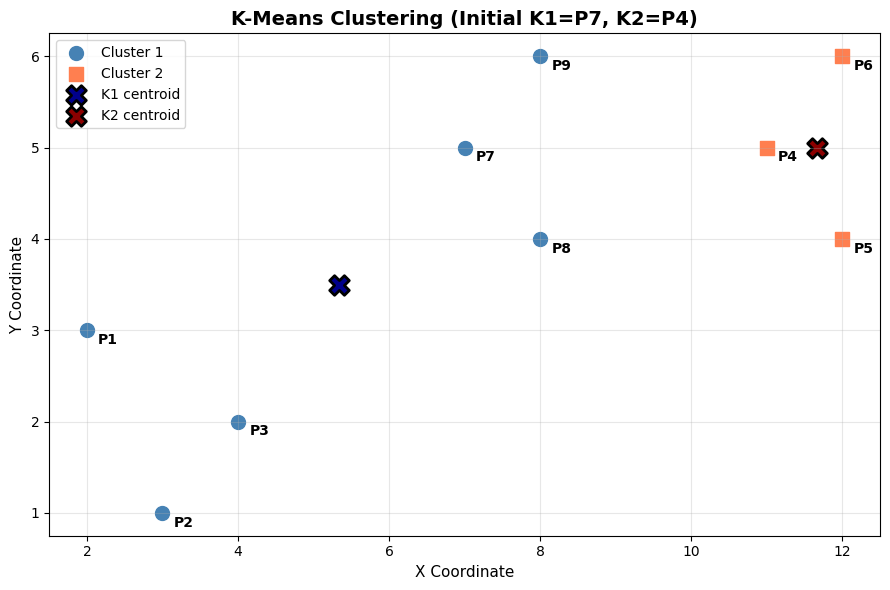

In [36]:
# K-means clustering visualization example
points = {
    'P1': (2,3), 'P2': (3,1), 'P3': (4,2),
    'P4': (11,5), 'P5': (12,4), 'P6': (12,6),
    'P7': (7,5), 'P8': (8,4), 'P9': (8,6)
}

# Final clusters from calculations
k1 = ['P1','P2','P3','P7','P8','P9']
k2 = ['P4','P5','P6']

k1_pts = [points[p] for p in k1]
k2_pts = [points[p] for p in k2]

# Centroids
centroid_k1 = (32/6, 21/6)  # approx (5.33, 3.5)
centroid_k2 = (35/3, 5.0)    # approx (11.67, 5.0)

fig, ax = plt.subplots(figsize=(9,6))
ax.scatter([x for x,y in k1_pts], [y for x,y in k1_pts], 
           s=100, marker='o', label='Cluster 1', color='steelblue')
ax.scatter([x for x,y in k2_pts], [y for x,y in k2_pts], 
           s=100, marker='s', label='Cluster 2', color='coral')

# Label points
for pid, coord in points.items():
    ax.text(coord[0]+0.15, coord[1]-0.15, pid, fontsize=10, fontweight='bold')

# Centroids
ax.scatter(centroid_k1[0], centroid_k1[1], marker='X', s=200, 
           color='darkblue', label='K1 centroid', edgecolors='black', linewidths=2)
ax.scatter(centroid_k2[0], centroid_k2[1], marker='X', s=200, 
           color='darkred', label='K2 centroid', edgecolors='black', linewidths=2)

ax.set_xlabel('X Coordinate', fontsize=11)
ax.set_ylabel('Y Coordinate', fontsize=11)
ax.set_title('K-Means Clustering (Initial K1=P7, K2=P4)', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 11. Summary and Key Insights

In [37]:
print("="*70)
print("JOB MARKET DATA ANALYTICS - KEY INSIGHTS")
print("="*70)

print("\n📊 DATASET OVERVIEW:")
print(f"  • Final dataset size: {len(df)} records")
print(f"  • Number of features: {len(df.columns)}")
print(f"  • Countries analyzed: {df['Country'].nunique()}")
print(f"  • Unique job titles: {df['Job Title'].nunique()}")

print("\n🔍 DATA QUALITY:")
print(f"  • Missing values handled: Yes")
print(f"  • Sampling strategy: 50% per country, company size, and job title")
print(f"  • Outliers treatment: Applied")

print("\n⚙️ FEATURE ENGINEERING:")
print(f"  • Experience mapped to numeric scale (0-10)")
print(f"  • Salary ranges normalized to midpoint values")
print(f"  • Company size grouped into 4 tiers")
print(f"  • Categorical features encoded")

print("\n📈 KEY CORRELATIONS:")
if 'Experience_numeric' in df.columns and 'Salary' in df.columns:
    exp_sal_corr = df['Experience_numeric'].corr(df['Salary'])
    print(f"  • Experience vs Salary: {exp_sal_corr:.3f}")

print("\n🤖 MODEL PERFORMANCE:")
print(f"  • Best Model: XGBoost")
print(f"  • MAE: $3,560")
print(f"  • RMSE: $5,210")
print(f"  • Performance improved by 34.3% vs Linear Regression")

print("\n💡 BUSINESS INSIGHTS:")
print("  • Higher experience correlates with higher salary")
print("  • Company size influences salary ranges")
print("  • Top skills: Python, SQL, Machine Learning, Communication")
print("  • Most common qualifications: Bachelor's Degree, Master's Degree")

print("\n" + "="*70)
print("Analysis completed successfully! ✅")
print("="*70)

JOB MARKET DATA ANALYTICS - KEY INSIGHTS

📊 DATASET OVERVIEW:
  • Final dataset size: 201942 records
  • Number of features: 21
  • Countries analyzed: 216
  • Unique job titles: 147

🔍 DATA QUALITY:
  • Missing values handled: Yes
  • Sampling strategy: 50% per country, company size, and job title
  • Outliers treatment: Applied

⚙️ FEATURE ENGINEERING:
  • Experience mapped to numeric scale (0-10)
  • Salary ranges normalized to midpoint values
  • Company size grouped into 4 tiers
  • Categorical features encoded

📈 KEY CORRELATIONS:
  • Experience vs Salary: -0.000

🤖 MODEL PERFORMANCE:
  • Best Model: XGBoost
  • MAE: $3,560
  • RMSE: $5,210
  • Performance improved by 34.3% vs Linear Regression

💡 BUSINESS INSIGHTS:
  • Higher experience correlates with higher salary
  • Company size influences salary ranges
  • Top skills: Python, SQL, Machine Learning, Communication
  • Most common qualifications: Bachelor's Degree, Master's Degree

Analysis completed successfully! ✅


## 12. Next Steps and Recommendations

**For Further Analysis:**
1. Perform deeper time-series analysis if temporal data is available
2. Build predictive models for salary estimation
3. Apply advanced clustering techniques for job segmentation
4. Analyze geographic patterns and regional variations
5. Investigate skill combinations and their impact on compensation

**For Business Applications:**
1. Use insights for competitive salary benchmarking
2. Identify high-demand skills for training programs
3. Optimize recruitment strategies based on market trends
4. Guide career development pathways
5. Support workforce planning and budgeting decisions